In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain
%pip install torchlibrosa

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.RNN import LSTM
from genrecog.tools.trainer import RNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model = LSTM(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=True
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

LSTM(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
trainer = RNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 30.09
Training loss 1.8824
Validation accuracy 9.00
Validation loss 2.2974
============================== EPOCH 2 =================================
Training accuracy 44.50
Training loss 1.5698
Validation accuracy 15.00
Validation loss 2.2448
============================== EPOCH 3 =================================
Training accuracy 47.66
Training loss 1.4535
Validation accuracy 31.50
Validation loss 2.1780
============================== EPOCH 4 =================================
Training accuracy 52.62
Training loss 1.3483
Validation accuracy 36.50
Validation loss 2.1102
============================== EPOCH 5 =================================
Training accuracy 54.75
Training loss 1.2598
Validation accuracy 50.75
Validation loss 1.9803
============================== EPOCH 6 =================================
Training accuracy 58.25
Training loss 1.1855
Validation accuracy 48.00
Validation loss 1.8039

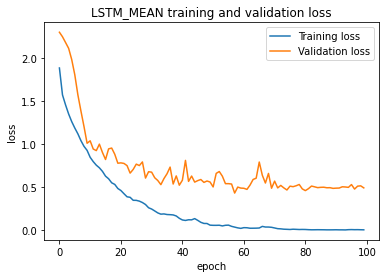

In [8]:
trainer.plot_loss("LSTM_MEAN training and validation loss")

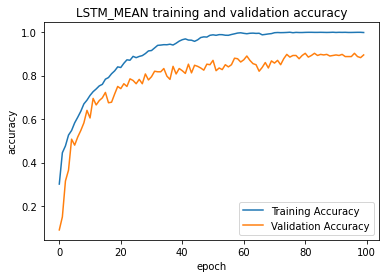

In [9]:
trainer.plot_accuracies("LSTM_MEAN training and validation accuracy")

In [10]:
trainer.eval(test_dataloader)

(tensor([8, 1, 7, 3, 8, 7, 7, 0, 5, 1, 2, 0, 9, 7, 3, 4, 9, 0, 3, 2, 3, 4, 6, 2,
         9, 4, 0, 2, 3, 4, 3, 2, 6, 0, 2, 7, 3, 8, 2, 9, 9, 5, 7, 8, 8, 2, 8, 6,
         1, 6, 9, 6, 1, 3, 7, 7, 8, 2, 7, 2, 7, 4, 4, 6, 9, 0, 6, 1, 1, 1, 9, 8,
         9, 5, 6, 3, 9, 8, 9, 1, 3, 0, 2, 1, 3, 8, 4, 9, 9, 4, 0, 5, 7, 6, 4, 8,
         4, 4, 9, 9, 9, 2, 8, 4, 0, 8, 2, 3, 9, 3, 4, 6, 7, 7, 8, 7, 6, 2, 4, 4,
         6, 8, 2, 5, 9, 0, 7, 6, 6, 9, 5, 3, 3, 7, 3, 2, 6, 9, 8, 0, 1, 0, 4, 9,
         9, 9, 8, 6, 0, 9, 9, 0, 2, 5, 3, 7, 0, 3, 8, 7, 2, 3, 9, 7, 2, 2, 5, 6,
         3, 8, 1, 2, 0, 4, 6, 7, 2, 9, 3, 8, 0, 4, 2, 5, 2, 0, 0, 5, 8, 9, 9, 6,
         4, 9, 3, 6, 2, 6, 6, 2, 8, 2, 9, 2, 5, 2, 8, 4, 7, 9, 4, 0, 8, 8, 6, 0,
         0, 5, 2, 8, 5, 4, 8, 3, 9, 5, 0, 6, 3, 2, 4, 7, 7, 8, 9, 3, 5, 4, 9, 8,
         6, 7, 1, 9, 1, 1, 6, 7, 7, 1, 2, 2, 0, 1, 5, 1, 3, 6, 5, 0, 8, 0, 4, 0,
         7, 9, 7, 9, 9, 2, 9, 3, 8, 8, 9, 1, 8, 9, 7, 9, 0, 5, 8, 5, 5, 1, 3, 5,
         3, 5, 0, 0, 4, 6, 7

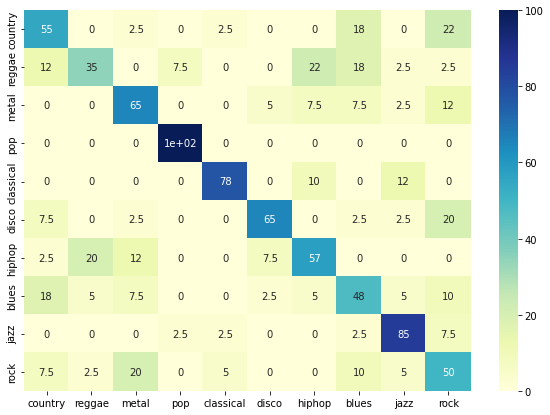

In [11]:
trainer.plot_confusion_matrix(test_dataloader)

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.54      0.55      0.54        40
      reggae       0.56      0.35      0.43        40
       metal       0.59      0.65      0.62        40
         pop       0.91      1.00      0.95        40
   classical       0.89      0.78      0.83        40
       disco       0.81      0.65      0.72        40
      hiphop       0.56      0.57      0.57        40
       blues       0.45      0.47      0.46        40
        jazz       0.74      0.85      0.79        40
        rock       0.40      0.50      0.44        40

    accuracy                           0.64       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.64      0.64      0.64       400



In [13]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model_2 = LSTM(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=True
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

LSTM(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
trainer_2 = RNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=70)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 32.37
Training loss 1.8980
Validation accuracy 15.75
Validation loss 2.2891
============================== EPOCH 2 =================================
Training accuracy 45.31
Training loss 1.5338
Validation accuracy 12.25
Validation loss 2.2527
============================== EPOCH 3 =================================
Training accuracy 49.84
Training loss 1.4154
Validation accuracy 35.50
Validation loss 2.1627
============================== EPOCH 4 =================================
Training accuracy 52.87
Training loss 1.3337
Validation accuracy 37.75
Validation loss 2.0941
============================== EPOCH 5 =================================
Training accuracy 55.94
Training loss 1.2375
Validation accuracy 43.50
Validation loss 1.9979
============================== EPOCH 6 =================================
Training accuracy 58.66
Training loss 1.1709
Validation accuracy 52.25
Validation loss 1.810

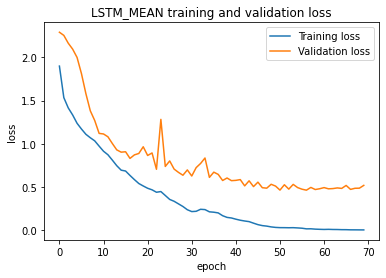

In [15]:
trainer_2.plot_loss("LSTM_MEAN training and validation loss")

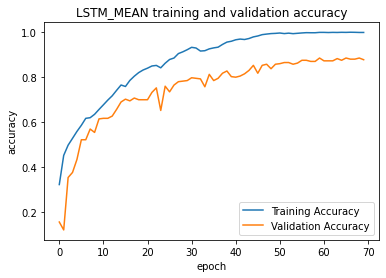

In [16]:
trainer_2.plot_accuracies("LSTM_MEAN training and validation accuracy")

In [17]:
trainer_2.eval(test_dataloader)

(tensor([8, 0, 7, 8, 8, 2, 2, 3, 4, 3, 7, 4, 0, 0, 0, 0, 7, 3, 8, 2, 6, 7, 0, 1,
         1, 8, 3, 2, 6, 7, 8, 6, 2, 3, 7, 4, 0, 3, 2, 8, 8, 5, 3, 4, 0, 0, 2, 7,
         9, 0, 6, 7, 2, 0, 2, 9, 8, 2, 0, 6, 4, 9, 5, 8, 6, 5, 4, 0, 4, 2, 2, 0,
         9, 8, 9, 0, 3, 0, 4, 0, 5, 0, 6, 5, 2, 8, 4, 7, 6, 9, 0, 6, 8, 1, 5, 8,
         9, 6, 3, 5, 1, 9, 8, 6, 0, 3, 0, 0, 8, 8, 4, 4, 0, 4, 0, 6, 2, 1, 4, 0,
         9, 4, 9, 6, 2, 7, 2, 0, 2, 0, 5, 2, 8, 4, 8, 6, 4, 9, 3, 6, 3, 3, 2, 0,
         0, 6, 0, 8, 4, 6, 3, 9, 7, 6, 3, 2, 2, 7, 9, 9, 0, 8, 4, 2, 0, 6, 4, 5,
         6, 9, 7, 7, 6, 7, 7, 6, 5, 6, 7, 8, 5, 9, 3, 0, 5, 0, 3, 0, 8, 9, 9, 3,
         5, 7, 9, 8, 8, 3, 1, 4, 9, 0, 0, 0, 4, 3, 7, 8, 1, 3, 0, 0, 0, 2, 5, 5,
         7, 6, 1, 0, 0, 8, 9, 6, 4, 0, 6, 4, 8, 7, 7, 5, 8, 0, 8, 0, 7, 6, 2, 0,
         4, 9, 3, 7, 6, 2, 9, 0, 3, 7, 5, 7, 6, 9, 6, 2, 3, 9, 3, 7, 9, 6, 4, 0,
         6, 6, 9, 9, 8, 7, 1, 3, 3, 0, 6, 2, 6, 8, 9, 5, 2, 9, 5, 1, 4, 3, 2, 8,
         6, 6, 6, 1, 8, 8, 3

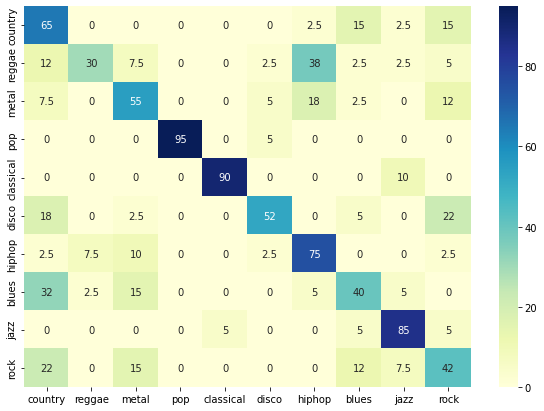

In [18]:
trainer_2.plot_confusion_matrix(test_dataloader)

In [19]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.41      0.65      0.50        40
      reggae       0.75      0.30      0.43        40
       metal       0.52      0.55      0.54        40
         pop       1.00      0.95      0.97        40
   classical       0.95      0.90      0.92        40
       disco       0.78      0.53      0.63        40
      hiphop       0.55      0.75      0.63        40
       blues       0.48      0.40      0.44        40
        jazz       0.76      0.85      0.80        40
        rock       0.40      0.42      0.41        40

    accuracy                           0.63       400
   macro avg       0.66      0.63      0.63       400
weighted avg       0.66      0.63      0.63       400

